In [19]:
import numpy as np
from sympy import symbols, Matrix, simplify, pprint
import matplotlib.pyplot as plt
from pyscf import gto, scf

In [20]:
ethene = """ 
  C   -0.0000000    0.0000000    0.6654947
  C    0.0000000   -0.0000000   -0.6654947
  H    0.0000000    0.9374304    1.2121604
  H   -0.0000000   -0.9374304    1.2121604
  H    0.0000000    0.9374304   -1.2121604
  H   -0.0000000   -0.9374304   -1.2121604"""

ethene_molecule = gto.M(atom=ethene, basis='sto-3g')#'sto-6g''ccpvdz'
pz_indices = [i for i, label in enumerate(ethene_molecule.ao_labels()) if 'C 2px' in label]
print(pz_indices)
hf = scf.RHF(ethene_molecule)
hf_energy = hf.kernel()

[2, 7]
converged SCF energy = -77.0721278404491


In [21]:
mo_coeff = hf.mo_coeff.round(6)
def normaliseer(eigenvectors):
    eigenvectors = eigenvectors.T
    for index, eigenvector in enumerate(eigenvectors):
        eigenvectors[index] = eigenvector * (np.dot(eigenvector, eigenvector))**(-1/2)
    return eigenvectors.T
mo_coeff = normaliseer(mo_coeff)
print(mo_coeff)

[[ 0.70678542  0.70636612 -0.23295523  0.16781987  0.         -0.01742552
  -0.         -0.         -0.         -0.         -0.06701341 -0.08242266
   0.          0.05755766]
 [ 0.02011276  0.03127717  0.614974   -0.51161524  0.          0.0265925
   0.          0.          0.          0.          0.44184995  0.51425141
  -0.         -0.43803264]
 [ 0.          0.          0.          0.          0.          0.
  -0.          0.70710678 -0.70710678  0.         -0.          0.
   0.          0.        ]
 [ 0.         -0.         -0.         -0.          0.51803438 -0.
   0.44114042 -0.         -0.          0.44320374 -0.         -0.
  -0.52320842  0.        ]
 [ 0.00208157 -0.00450744 -0.15051863 -0.24208178  0.         -0.60275023
  -0.          0.          0.          0.          0.27107696  0.12545285
   0.          0.54863916]
 [ 0.70678542 -0.70636612 -0.23295523 -0.16781987 -0.         -0.01742552
  -0.          0.         -0.         -0.         -0.06701341  0.08242266
  -0.     

In [22]:
mo_eigenvalues = hf.mo_energy[[7,8]]
print(mo_eigenvalues)
pz_orbitals = mo_coeff[pz_indices][:,[7,8]]
print(pz_orbitals)

[-0.32551112  0.32068882]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [28]:
def plotting_of_the_system(number_of_atoms, eigenvectors, eigenvalues, theory):
    transposed_eigenvectors = eigenvectors.T

    
    # Plot de moleculaire orbitalen
    fig, axs = plt.subplots(1, len(eigenvalues), figsize=(10, 4), dpi=400)
    
    for i in range(len(eigenvalues)):
        ax = axs[i]
        
        # Punten op een lijn
        line_x = np.linspace(0, number_of_atoms - 1, number_of_atoms)
        line_y = np.zeros(number_of_atoms)
        
        ax.plot(line_x, line_y, linestyle='-', color='grey')
        
        # Plot de atoomcoëfficiënten als gekleurde bollen
        for j in range(number_of_atoms):
            c = transposed_eigenvectors[i, j]

            if c > 0:
                color = 'blue'
            else:
                color = 'red'

            size = abs(c) * 3000  # Schaal de grootte van de bol op basis van de coëfficiënt
            ax.scatter(line_x[j], line_y[j], s=size, marker='o', color=color, zorder=2)
            
            # Coëfficiënten in de bollen tonen
            ax.text(line_x[j], 0, f'{c:.2f}', ha='center', va='center', fontsize=12, color='black', fontweight='bold')

        ax.set_title(f'MO {i + 1}\nEnergy: {eigenvalues[i]:.2f} eV')
        ax.margins(0.3)
        ax.axis('off')
    
    # Stel het algehele plot-titel in
    plt.suptitle(f'Molecular Orbitals - Ethene - {theory}')

    # Zorg ervoor dat de subplots niet overlappen
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Toon de plot
    plt.show()


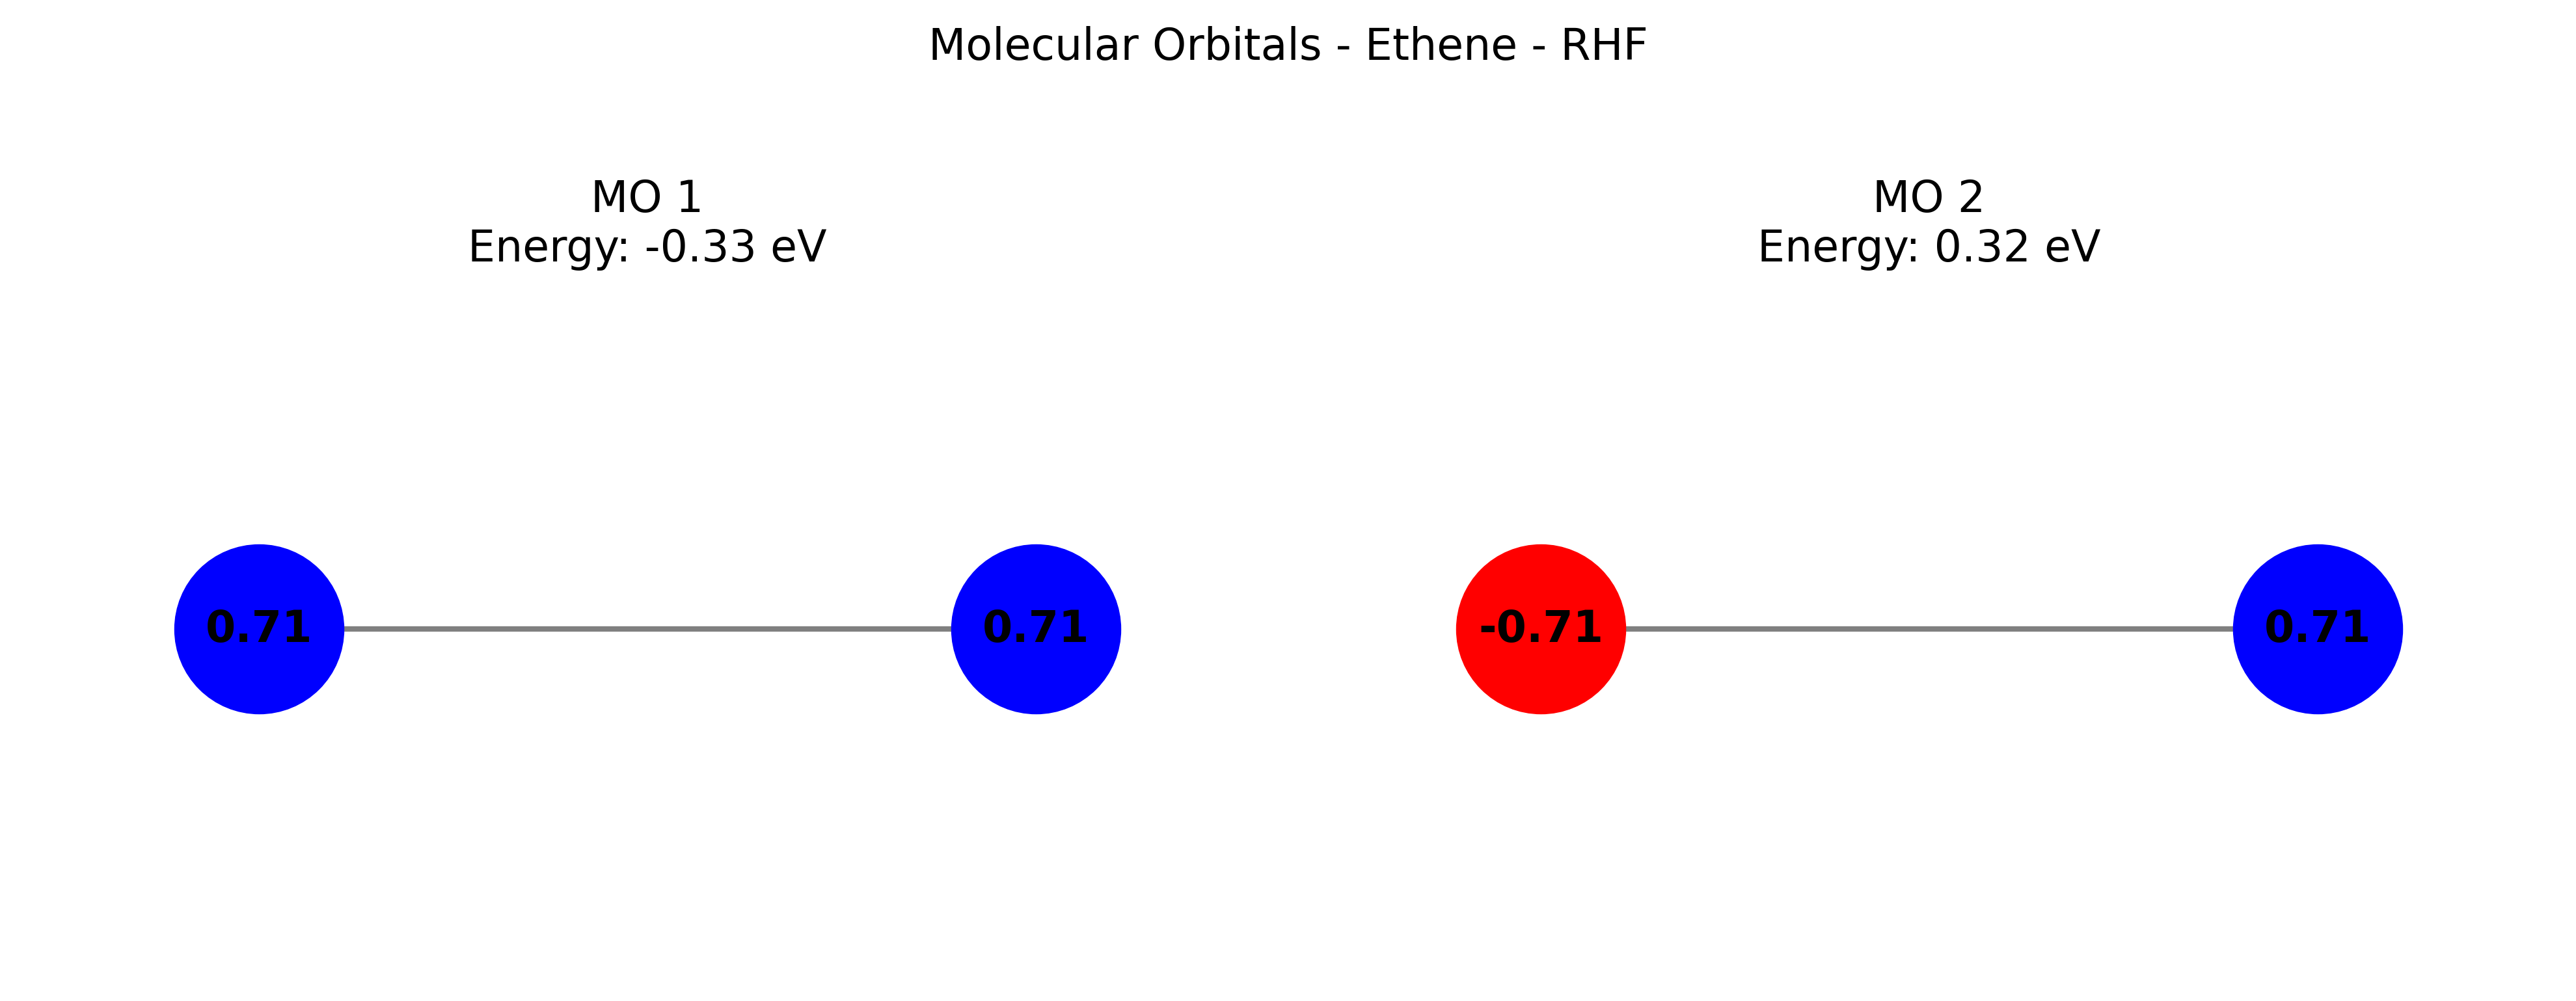

In [29]:
plotting_of_the_system(2, pz_orbitals, mo_eigenvalues, 'RHF')

In [25]:
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/Huckel')
from class_huckel import huckel
Ethene = huckel(2, -0, -0.33, configuration='lin')
Ethene.create_matrix()

huc_mat = Ethene.huckel_matrix
print(huc_mat)

[[ 0.   -0.33]
 [-0.33  0.  ]]


In [26]:
Ethene.solve_huckel_matrix()
eigval = Ethene.eigenvalues
eigvec = Ethene.eigenvectors

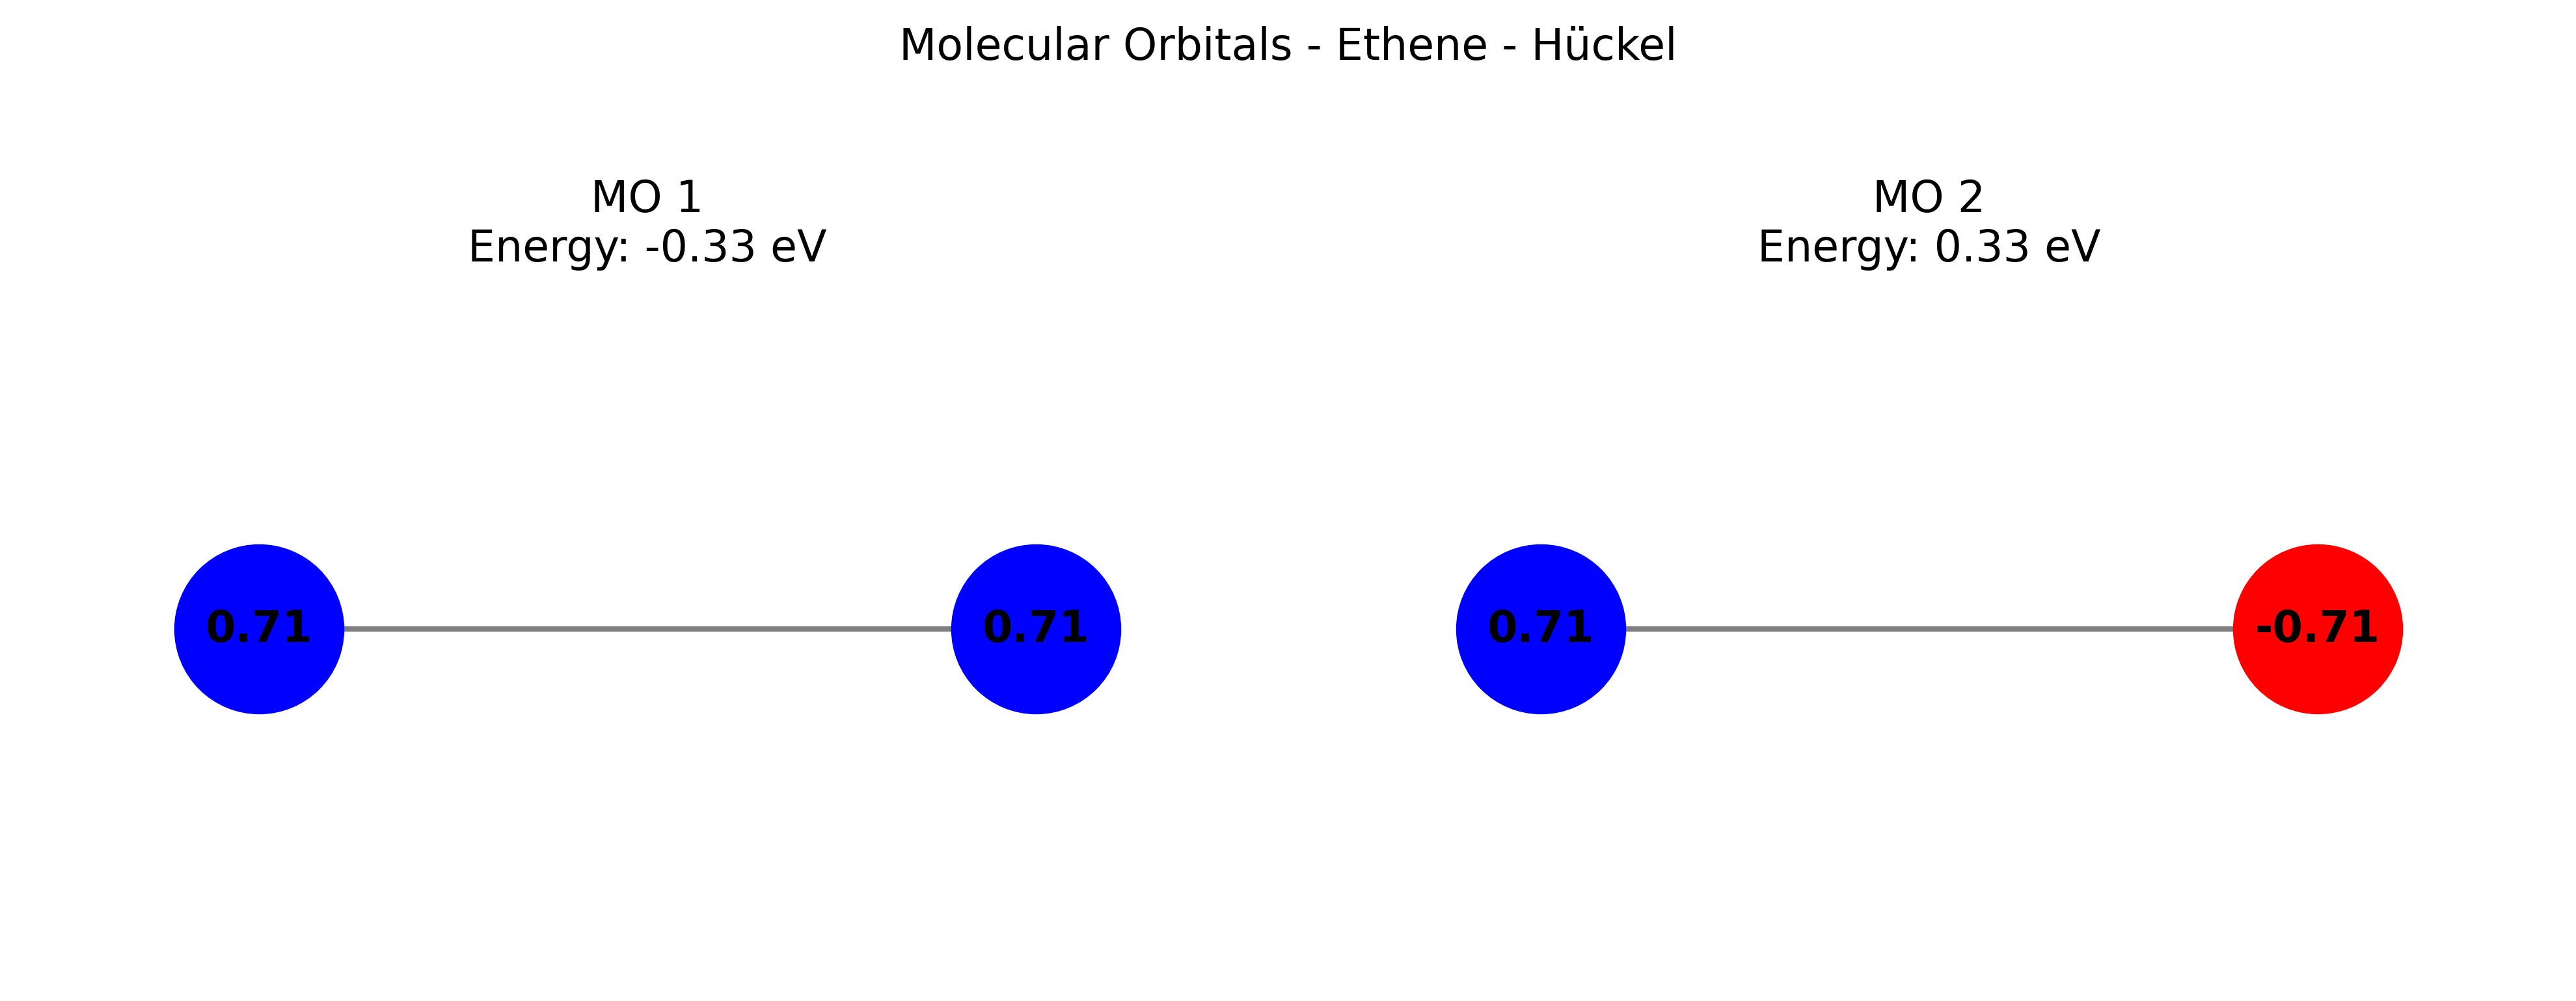

In [30]:
plotting_of_the_system(2, eigvec, eigval, 'Hückel')